<a href="https://colab.research.google.com/github/dgbaenar/deep-learning-with-tensorflow/blob/main/Learning_Tensorflow_Chapter_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 4.1. Language model - Predicting movie likes or dislikes

In [2]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

17473536/17464789 [==============================] - 0s 0us/step


The variables train_data and test_data are lists of reviews; each review is a list of word indices (encoding a sequence of words). train_labels and test_labels are lists of 0s and 1s, where 0 stands for negative and 1 stands for positive

In [3]:
train_data

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

In [4]:
train_labels

array([1, 0, 0, ..., 0, 1, 0])

In [5]:
max([max(sequence) for sequence in train_data])

9999

In [6]:
word_index = imdb.get_word_index()                                
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])       
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

1654784/1641221 [==============================] - 0s 0us/step


In [7]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

## Encoding the integer sequences via multi-hot encoding

In [16]:
import numpy as np 


def vectorize_sequences(sequences, dimension=10000): 
    results = np.zeros((len(sequences), dimension))   
    for i, sequence in enumerate(sequences):
        for j in sequence:
          # The reason because some numbers of the output are zero, it's
          # because we are marking indices of the list, and those indices depends
          # on each value of each list in the input sequence
            results[i, j] = 1.                        
    return results


x_train = vectorize_sequences(train_data)             
x_test = vectorize_sequences(test_data) 

In [9]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [10]:
len(x_train[0])

10000

In [13]:
x_train[0][:10]

array([0., 1., 1., 0., 1., 1., 1., 1., 1., 1.])

In [15]:
for i, j in enumerate(train_data):
  print(i, j)
  break

0 [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


## Model Definition

In [17]:
from tensorflow import keras 
from tensorflow.keras import layers
  
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [18]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [19]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [20]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 35ms/step - loss: 0.5349 - accuracy: 0.7799 - val_loss: 0.4138 - val_accuracy: 0.8672
Epoch 2/20
30/30 [==============================] - 1s 31ms/step - loss: 0.3295 - accuracy: 0.8984 - val_loss: 0.3177 - val_accuracy: 0.8842
Epoch 3/20
30/30 [==============================] - 1s 25ms/step - loss: 0.2391 - accuracy: 0.9254 - val_loss: 0.2832 - val_accuracy: 0.8896
Epoch 4/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1869 - accuracy: 0.9391 - val_loss: 0.2733 - val_accuracy: 0.8911
Epoch 5/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1520 - accuracy: 0.9521 - val_loss: 0.2818 - val_accuracy: 0.8882
Epoch 6/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1249 - accuracy: 0.9625 - val_loss: 0.3164 - val_accuracy: 0.8802
Epoch 7/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1043 - accuracy: 0.9683 - val_loss: 0.3387 - val_accuracy: 0.8760
Epoch 8/20
30

In [22]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

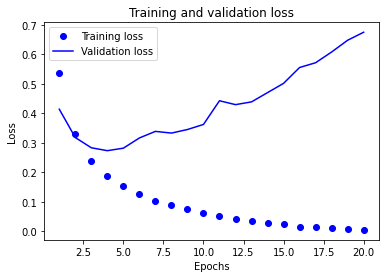

In [24]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")       
plt.plot(epochs, val_loss_values, "b", label="Validation loss")  
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

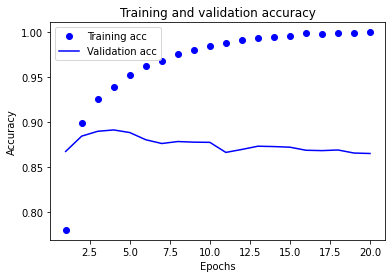

In [25]:
plt.clf()                           
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In this case, to prevent overfitting, you could stop training after four epochs. In general, you can use a range of techniques to mitigate overfitting, which we’ll cover in chapter 5.

Let’s train a new model from scratch for four epochs and then evaluate it on the test data.

In [26]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 20ms/step - loss: 0.4703 - accuracy: 0.8189
Epoch 2/4
49/49 [==============================] - 1s 20ms/step - loss: 0.2679 - accuracy: 0.9084
Epoch 3/4
49/49 [==============================] - 1s 20ms/step - loss: 0.2048 - accuracy: 0.9281
Epoch 4/4
782/782 [==============================] - 1s 2ms/step - loss: 0.3002 - accuracy: 0.8812


In [27]:
results

[0.3001624047756195, 0.8812400102615356]

The first number, 0.29, is the test loss, and the second number, 0.88, is the test accuracy.

This fairly naive approach achieves an accuracy of 88%. With state-of-the-art approaches, you should be able to get close to 95%.

## 4.1.2. Using the trained model to generate predictions on new data

In [28]:
model.predict(x_test)

array([[0.17179072],
       [0.99978125],
       [0.6134919 ],
       ...,
       [0.08425489],
       [0.06414258],
       [0.65698844]], dtype=float32)

### 4.1.3. Lesson conclussions

* You usually need to do quite a bit of preprocessing on your raw data in order to be able to feed it—as tensors—into a neural network. Sequences of words can be encoded as binary vectors, but there are other encoding options too.

* Stacks of Dense layers with relu activations can solve a wide range of problems (including sentiment classification), and you’ll likely use them frequently.

* In a binary classification problem (two output classes), your model should end with a Dense layer with one unit and a sigmoid activation: the output of your model should be a scalar between 0 and 1, encoding a probability.

* With such a scalar sigmoid output on a binary classification problem, the loss function you should use is binary_crossentropy.

* The rmsprop optimizer is generally a good enough choice, whatever your problem. That’s one less thing for you to worry about.

* As they get better on their training data, neural networks eventually start overfitting and end up obtaining increasingly worse results on data they’ve never seen before. Be sure to always monitor performance on data that is outside of the training set.